# Проект для магазина игр "Стримчик"

### Описание

доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры, платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные компании.

Перед нами данные до 2016 года. Необходимо спланировать компанию на 2017 год.

ОПИСАНИЕ ДАННЫХ:

- `Name` - название игры
- `Platform` - платформа
- `Year_of_Release` - год выпуска
- `Genre` - жанр игры
- `NA_sales` - продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` - продажи в Европе (миллионы проданных копий)
- `JP_sales` - продажи в Японии (миллионы проданных копий)
- `Other_sales` - продажи в других странах (миллионы проданных копий)
- `Critic_Score` - оценка критиков (максимум 100)
- `User_Score` - оценка пользователей (максимум 10)
- `Rating` - рейтинг от организации [ESRB](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board "ESRB")

*Данные за 2016 год могут быть не полными


## Импорт библиотек общие настройки

In [1]:
import pandas as pd
import numpy as np
import os
from scipy import stats as st
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.style.use('dark_background')

## Первичный анализ

In [2]:
try:
    path = os.path.join('/datasets/games.csv')
    data = pd.read_csv(path)
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

In [3]:
# Функция для вывода первичной информации по датасету
def first_view(data):
    title_lenght = 79
    title_one = 'Обзор данных первых и последних пяти строк'
    print('~' * int((title_lenght - len(title_one)) / 2), title_one, '~' * (title_lenght - len(title_one) - int((title_lenght - len(title_one)) / 2)))
    display(data.head(5))
    display(data.tail(5))
    print()
    title_two = 'Основная описательная статистика'
    print('~' * int((title_lenght - len(title_two)) / 2), title_two, '~' * (title_lenght - len(title_two) - int((title_lenght - len(title_two)) / 2)))
    display(data.describe())
    print()
    title_three = 'Тип данных' 
    print('~' * int((title_lenght - len(title_three)) / 2), title_three, '~' * (title_lenght - len(title_three) - int((title_lenght - len(title_three)) / 2)))
    data.info()
    print()
    title_four = 'Подсчёт пропусков'
    print('~' * int((title_lenght - len(title_four)) / 2), title_four, '~' * (title_lenght - len(title_four) - int((title_lenght - len(title_four)) / 2)))
    all_nulls = 0
    for col in data.columns:
       if data[col].isna().sum() > 0:
            all_nulls += 1
            print(data[col].isna().sum(), 'пропущенных значений в колонке', col, 'это', round(data[col].isna().mean() * 100,), '%')
    if all_nulls == 0:
        print('В датафрейме пропуски отсутствуют')
    print()
    title_five = 'Явные дубликаты'
    print('~' * int((title_lenght - len(title_five)) / 2), title_five, '~' * (title_lenght - len(title_five) - int((title_lenght - len(title_five)) / 2)))
    if data.duplicated().sum() > 0:
        print('Количество явных дубликатов - ', data.duplicated().sum())
    else:
        print('Явные дубликаты в датасете отсутствуют')
    print()
    title_six = 'Просмотр гистограмм датафрейма'
    print('~' * int((title_lenght - len(title_six)) / 2), title_six, '~' * (title_lenght - len(title_six) - int((title_lenght - len(title_six)) / 2)))
    data.hist(figsize = (8, 8));

~~~~~~~~~~~~~~~~~~ Обзор данных первых и последних пяти строк ~~~~~~~~~~~~~~~~~~~


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.00,Sports,41.36,28.96,3.77,8.45,76.00,8,E
1,Super Mario Bros.,NES,1985.00,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.00,Racing,15.68,12.76,3.79,3.29,82.00,8.3,E
3,Wii Sports Resort,Wii,2009.00,Sports,15.61,10.93,3.28,2.95,80.00,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.00,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.00,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.00,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.00,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.00,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.00,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,NaN



~~~~~~~~~~~~~~~~~~~~~~~ Основная описательная статистика ~~~~~~~~~~~~~~~~~~~~~~~~


,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.00,16715.00,16715.00,16715.00,16715.00,8137.00
mean,2006.48,0.26,0.15,0.08,0.05,68.97
std,5.88,0.81,0.50,0.31,0.19,13.94
min,1980.00,0.00,0.00,0.00,0.00,13.00
25%,2003.00,0.00,0.00,0.00,0.00,60.00
50%,2007.00,0.08,0.02,0.00,0.01,71.00
75%,2010.00,0.24,0.11,0.04,0.03,79.00
max,2016.00,41.36,28.96,10.22,10.57,98.00



~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Тип данных ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ Подсчёт пропусков ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
2 пропущенных значений в колонке Name это 0 %
269 пропущенных значений в ко

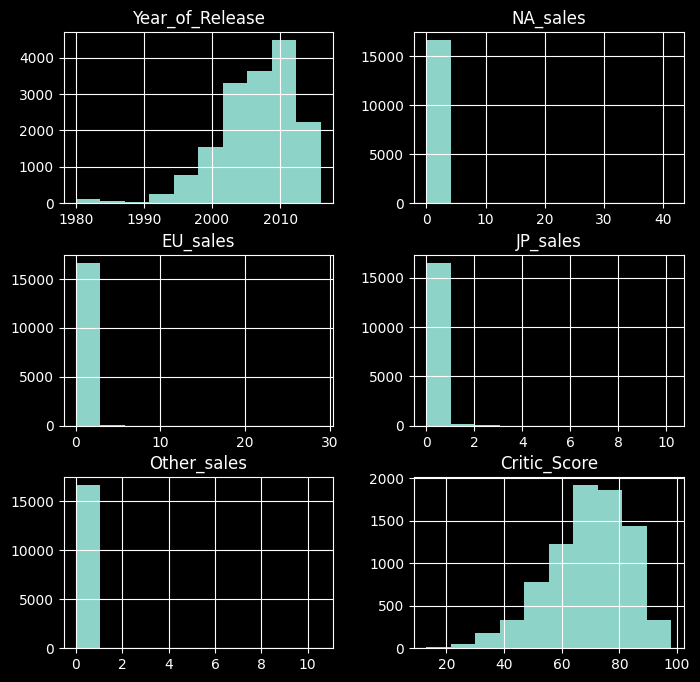

In [4]:
first_view(data)

нужно избавится от выбросов в 
год перевести в целые значения

## Предобработка данных

### Исправим стиль названий столбцов, сделаем их в змеином регистре

In [5]:
data.columns = data.columns.str.lower()

### Преобразуем типы данных

Изцчим столбец с годами

In [6]:
data['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983.])

Данные в столбце имеют формат float, а так как мы имеем дело с дискретной величиной, нам это не подходит. Необходимо исправить, но перед этим необходимо избавится от строк с пропусками, таких строк всего 269, это около 2%, а смысловой нагрузки в нашем анализк они не несут

In [7]:
data.dropna(subset = ['year_of_release'], inplace = True)

data['year_of_release'] = data['year_of_release'].astype('int')
data['year_of_release'].unique() # проверяем

array([2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010,
       2013, 2004, 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014,
       1992, 1997, 1993, 1994, 1982, 2016, 2003, 1986, 2000, 1995, 1991,
       1981, 1987, 1980, 1983])

Столбец с оценками пользователей переведём из типа object в тип float.

In [8]:
display(data['user_score'].unique())
display(data['user_score'].value_counts())

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

user_score
tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: count, Length: 96, dtype: int64

Помимо оценок и пропусков (`NaN`) присутствует значение `tbd`, причём в больших количествах.

`tbd` - аббревиатура от английского To Be Determined (будет определено), необходимо от этих значений избавится и преобразовать все значения столбца в количественные.
Применим метод `to_numeric` с параметром `errors = 'coerce'`, он принудительно заменит все ошибки на `NaN`, нам это нужно чтобы избавится от значений `tbd`

In [9]:
data['user_score'] = pd.to_numeric(data['user_score'], errors = 'coerce')
display(data['user_score'].unique()) # проверяем

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

### Разберёмся с пропусками

Удалим строки в которых нет названия игры, жанра. Таких строк всего по две, а возможно и всего две, но нет смысла тратить время на то чтобы разбиратся, проще от них сразу избавится, полезной для нашего анализа информации они не содержат, а мешатся будут

In [10]:
data.dropna(subset = ['name', 'genre'], inplace = True)

# удостоверимся что пропуски удалены и заодно выведем оставшиеся пропуски
all_nulls = 0
for col in data.columns:
    if data[col].isna().sum() > 0:
        all_nulls += 1
        print(data[col].isna().sum(), 'пропущенных значений в колонке', col, 'это', round(data[col].isna().mean() * 100,), '%')
if all_nulls == 0:
    print('В датафрейме пропуски отсутствуют')

8461 пропущенных значений в колонке critic_score это 51 %
8981 пропущенных значений в колонке user_score это 55 %
6676 пропущенных значений в колонке rating это 41 %


Рассмотрим столбец ратинга

In [11]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Здесь обязательно нужна заглушка 'Unknown' для nan значений столбца rating, тк дальше проводится исследование по жанрам и данных об играх без рейтинга не будет на графиках.

In [12]:
data['rating'].fillna(value='Unknown', inplace = True)

# удостоверимся что пропуски удалены и заодно выведем оставшиеся пропуски
all_nulls = 0
for col in data.columns:
    if data[col].isna().sum() > 0:
        all_nulls += 1
        print(data[col].isna().sum(), 'пропущенных значений в колонке', col, 'это', round(data[col].isna().mean() * 100,), '%')
if all_nulls == 0:
    print('В датафрейме пропуски отсутствуют')

8461 пропущенных значений в колонке critic_score это 51 %
8981 пропущенных значений в колонке user_score это 55 %


Остались только пропуски в колонках оценок, их там довольно много, удалить их нельзя, заменять тоже нет смысла, оставим их

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец

In [13]:
data['sales_total'] = data[['na_sales','eu_sales','jp_sales','other_sales']].sum(axis=1)

## Исследовательский анализ данных

### Колличество выпущенных в разные годы игр

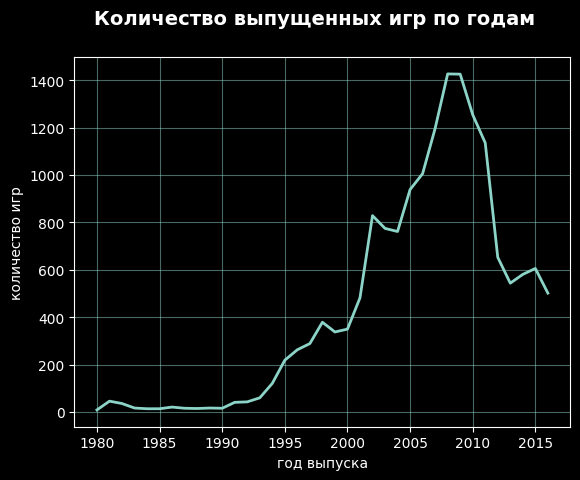

In [14]:
games_in_year = data.groupby('year_of_release')['name'].count()

fig = plt.figure()
ax = fig.add_subplot()
fig.subplots_adjust()
fig.suptitle('Количество выпущенных игр по годам', fontsize=14, fontweight='bold')
ax.set_xlabel('год выпуска')
ax.set_ylabel('количество игр')
plt.grid(color=(0.55, 0.83, 0.78), alpha=0.5)
ax.plot(games_in_year, linewidth=2, color=(0.55, 0.83, 0.78))
plt.show()

Из графика видно, что:
- до 90х игр выпускалось очень мало
- количество выпускаемых игр неуклонно растёт до 2008 года с небольшими перерывами в скорости увеличения количества игр в 1998 и 2002 годах
- с 2008 по 2013 количество выпускаемых данных падает
- после 2013 количество примерно стабилизируется в диапозоне 550-600 игр в год

Так как нас интересует прогноз на 2017 год, логично будет взять последний период в котором количество выпускаемых игр стабилизировалось, а именно 2014-2016

### Изменение продаж по платформам

Посмотрим на платформы, лидеры по продажам

In [15]:
data.groupby('platform')['sales_total'].sum().sort_values(ascending=False)

platform
PS2    1233.56
X360    961.24
PS3     931.34
Wii     891.18
DS      802.78
PS      727.58
PS4     314.14
GBA     312.88
PSP     289.53
3DS     257.81
PC      255.76
GB      254.43
XB      251.57
NES     251.05
N64     218.01
SNES    200.04
GC      196.73
XOne    159.32
2600     86.48
WiiU     82.19
PSV      53.81
SAT      33.59
GEN      28.35
DC       15.95
SCD       1.86
NG        1.44
WS        1.42
TG16      0.16
3DO       0.10
GG        0.04
PCFX      0.03
Name: sales_total, dtype: float64

In [16]:
platform_life_span = data.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max'])
platform_life_span['life_span'] = platform_life_span['max'] - platform_life_span['min']
avg_platform_life_span = np.round(platform_life_span['life_span'].mean())
print(f'Средний срок актуальности платформы на рынке {avg_platform_life_span} лет')

Средний срок актуальности платформы на рынке 8.0 лет


По расчётам, средний срок актуальности платформы на рынке 8.0 лет, посмотрим на лидеров прадаж, как они живут, на распределение их продаж по годам

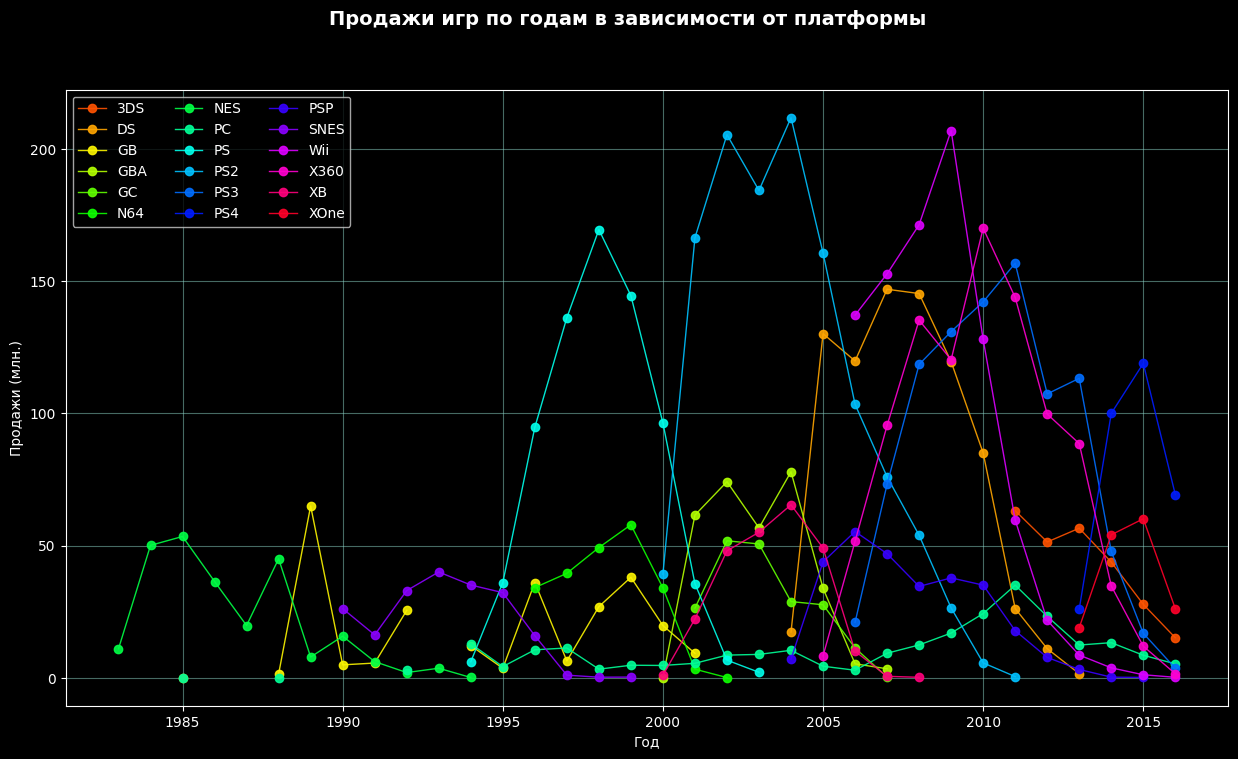

In [17]:
platform_top = data.groupby('platform')['sales_total'].sum().sort_values(ascending=False).head(18)
platform_pivot = data.query('platform in @platform_top.index').pivot_table(index='platform', columns='year_of_release', values='sales_total', aggfunc='sum')

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot()
fig.subplots_adjust()
fig.suptitle('Продажи игр по годам в зависимости от платформы', fontsize=14, fontweight='bold')
ax.set_xlabel('Год')
ax.set_ylabel('Продажи (млн.)')
plt.grid(color=(0.55, 0.83, 0.78), alpha=0.5)
palette = plt.get_cmap('hsv')
num = 0

for column in platform_pivot.T:
    num += int(256 / len(platform_pivot.T.columns))
    ax.plot(platform_pivot.T.index, platform_pivot.T[column], label=column, marker='o', color=palette(num), linewidth=1, alpha=0.9)

plt.legend(loc=2, ncol=3)
plt.show();

Если взглянуть на график, видно что есть платформы, которые хоть и имеют много прадаж по статистике, но они уже давно не актуальны. Рассмотим отдельные примеры. Для начала топ по продажам, более 500 млн проданных игр:

- PS2  (1234 млн копий) 2000-2011 года, прожила 11 лет, уже не актуальна
- X360 (961 млн копий) 2005-2016 года, пик продаж 2010 год, прожила 11 лет, на момент 2016 года, продажи упали до нуля, платформа отжила своё
- PS3  (931 млн копий) 2006-2016 года, пик продаж 2011 год, прожила 10 лет и на момент 2016 года продажи близки к нулю, платформа отжила своё, на 2015 год было продано ещё около 20 млн копий, платформа доживает своё, на смену ей пришла PS4, которую рассмотрим ниже
- Wii  (891 млн копий) 2006-2016 года, пик в 2009 году, продажи начали падать ещё раньше чем у предыдущих двух и хоть хвост длится до 2016 года, на 2015 год было продано ещё около 20 млн копий, платформа тоже практически не актуальна и доживает своё
- DS   (803 млн копий) 2004-2013 году в 2007 была актуальна, сейчас уже нет
- PS   (728 млн копий) 1994-2003 года, слова излишни - R.I.P.

Из этого можно сделать вывод что нас в таблице интересуют вовсе не эти платформы, они хоть и принесли их создателям хорошую прибыль, но это в прошлом. Посмотрим на актуальные платформы:
- PC   (256 млн копий) данные в таблице начинаются с 1994 годе, но этот случай в таблице уникальный, это персональный компьютер. Возможно число проданных копий на нём учитывается как-то по другому и поэтому он отстаёт от других платыорм так сильно, не смотря на долгий срок жизни, но так или иначе, актуальность его не упадёт ещё долго, не стоит сбрасывать его со счетов, хоть это и не игровая консоль, люди на ПК играют и будут играть
- PS4  (314 млн копий) врывается на рынок в 2013 году и вплоть до 2015 года лишь набирает обороты и является на этот момент лидером продаж. Это нас интересует
- XOne (159 млн копий) выглядит как основной конкурент PS4, тоже к 2015 года продажи растут
- 3DS  (258 млн копий) старт продаж в 2011 году, на момент 2015 года продалось около 30 млн копий, но тенденция к снижению

Остальные платформы из данной таблицы и не инетресуют нас.

Чтобы убедится что мы не упустили актуальных платформ отфильтровав датасет по лидерам продаж, построим графики для платформ актуальных на 2016 год

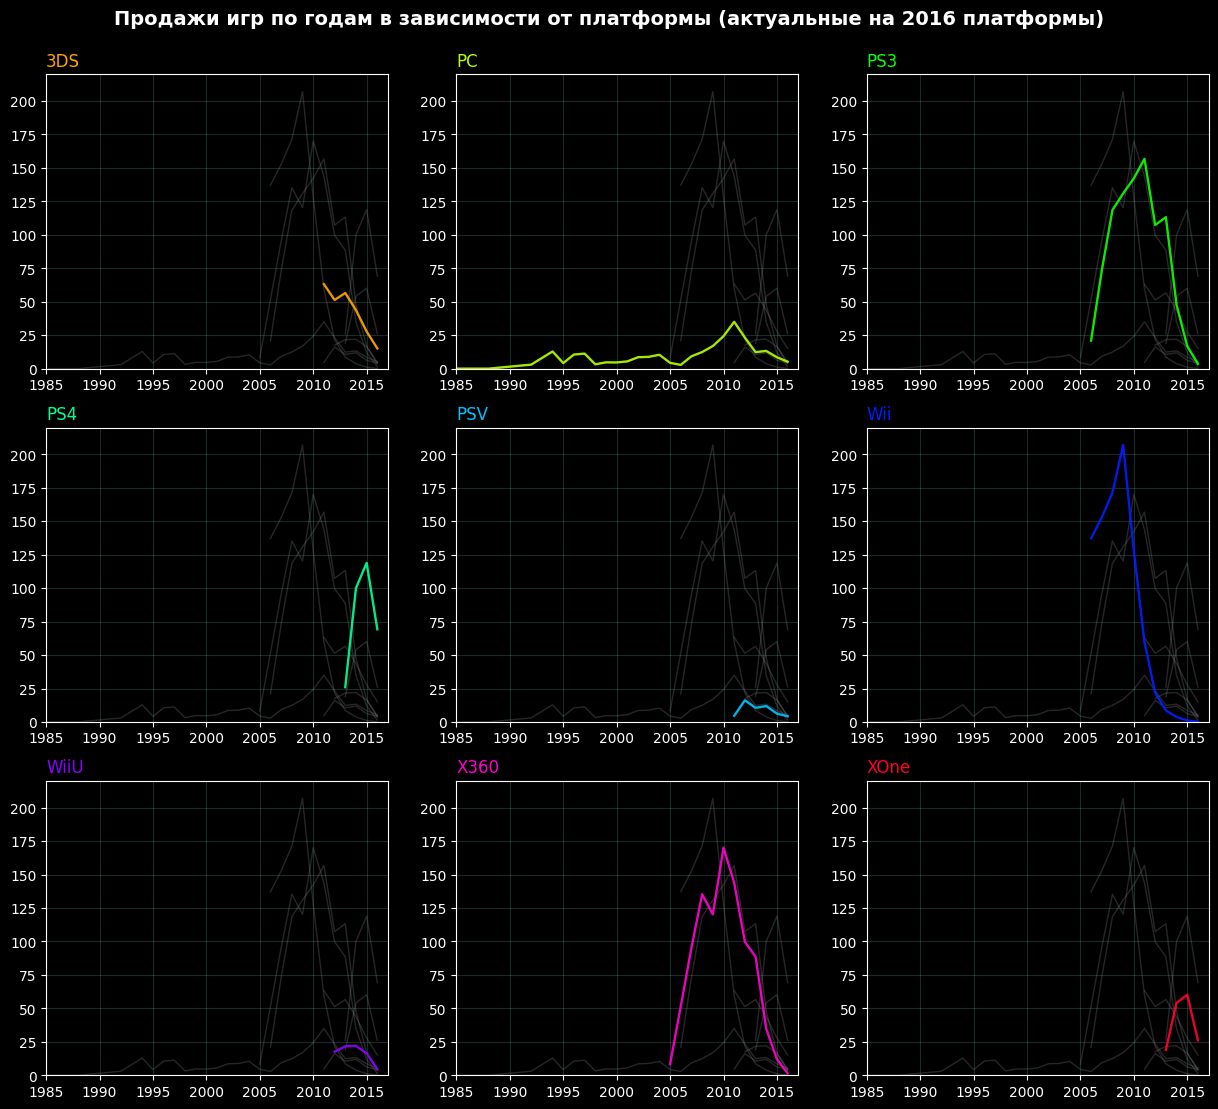

In [18]:
actual_2016_platforms = data.loc[data['year_of_release'] == 2016].groupby('platform')['sales_total'].sum()
platform_2016_pivot = data.query('platform in @actual_2016_platforms.index').pivot_table(index='platform', columns='year_of_release', values='sales_total', aggfunc='sum')

fig = plt.figure(figsize=(15, 13))
palette = plt.get_cmap('hsv')
num = 0
color = 0

for column in platform_2016_pivot.T:
    num += 1
    color += int(256 / len(platform_2016_pivot.T.columns))
    
    plt.subplot(3,3, num)
 
    for v in platform_2016_pivot.T:
        plt.plot(platform_2016_pivot.T.index, platform_2016_pivot.T[v], marker='', color='grey', linewidth=1, alpha=0.3)
 
    plt.plot(platform_2016_pivot.T.index, platform_2016_pivot.T[column], marker='', color=palette(color), linewidth=1.7, alpha=0.9, label=column)
 
    plt.xlim(1985,2017)
    plt.ylim(0,220)
    
    plt.grid(color=(0.55, 0.83, 0.78), alpha=0.2)

    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(color) )

plt.suptitle('Продажи игр по годам в зависимости от платформы (актуальные на 2016 платформы)', y=0.93, fontsize=14, fontweight='bold')
plt.show();

И действительно, мы чуть не упустили WiiU и PSV, хоть копий игр на эти платформы продано не много, но они актуальны и их стоило рассмотреть.

Для дальнейшего анализа и прогноза 2017 года нам потребуется актуальный период. Все актуальные платформы на 2016 год начинают своё существование в 2013 году или ранее. Тренды в сфере игр часто меняются, поэтому стоит взять небольшой период перед прогнозируемым годом, возьмём период 2014-2016.

### Отфильтруем таблицу

Сделаем срез по актуальному периоду

In [19]:
# в ручную выписываем в списки интересующий нас значения
a_year = [2014, 2015, 2016]

#отбираем в отдельный датасет актуальные данные
a_data = data.query('year_of_release in @a_year')

# проверяем
print(a_data['year_of_release'].unique())

[2015 2014 2016]


### Ящики с усами

(0.0, 3.0)

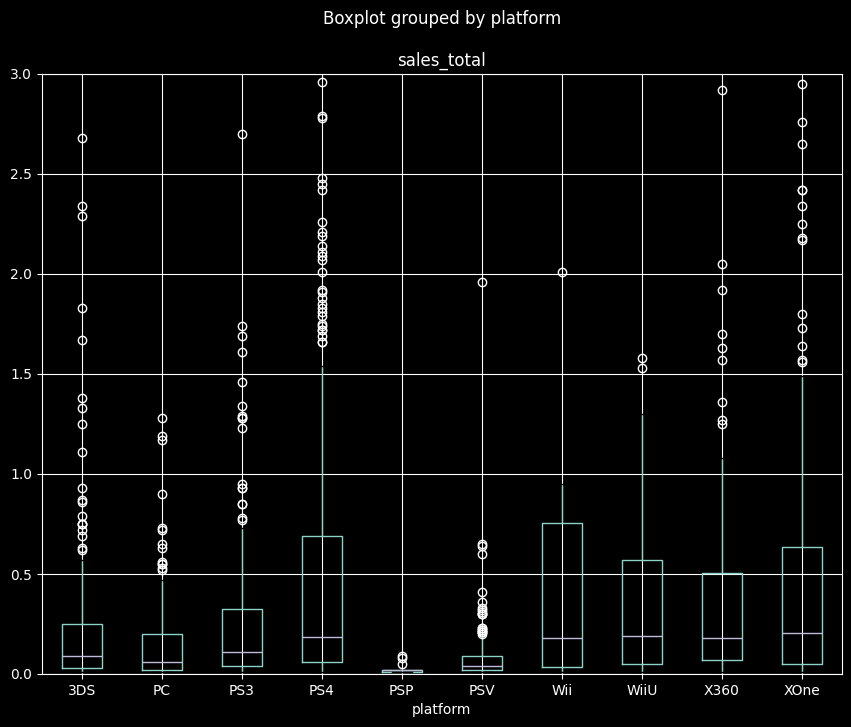

In [20]:
a_data.boxplot('sales_total', by='platform',figsize=(10,8)).set_ylim(0,3)

За актуальный период по продажам игр лидируют платформы PS4 и Xone, разброс продаж игр на эти платформы очень похож друг на друга. Основная часть показателей по сборам у игры на этой платформе от 100 тысяч до 1.1 миллиона копий с медианой возле 300 тысяч с выбросами за 2.5 млн копий у отдельных игр.
Хуже всего дела у PSV, игры редко продаются более чем в 250 тыс копий, а основная часть продаж вокруг примерно 50 тысяч копий. Так же в результатах имеется PSP у которой дела ещё хеже, но как мы помним по графику актуальных на 2016 год платформ, её там не было, а следовательно платформа потеряла свою актуальность в актуальном периоде, поэтому такие низкие показатели.

### Влияние отзывов на продажи

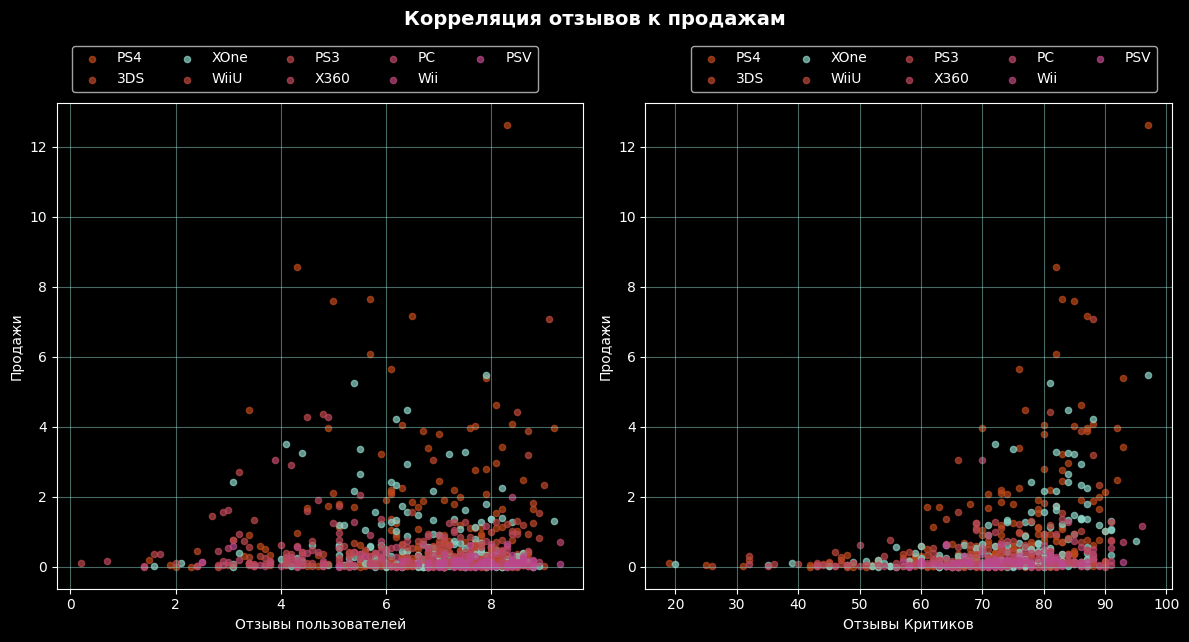

In [21]:
#обозначим переменными отделные столбцы и списки
a_platform = a_data["platform"].values #столбец платформ
a_sales = a_data['sales_total'].values #столбец продаж
a_user_scores = a_data['user_score'].values #столбец оценок пользователей
a_critic_scores = a_data['critic_score'].values #столбец оценок критиков
a_platforms_list = a_data["platform"].unique() #список платформ

#список цветов, третий для PS4 уникальный в цвет овормления, остальный это полутона противоположных цветов по цветовому кругу
color_list = ["#BB481B", "#BB482B", "#8DD3C7", "#BB483B", "#BB484B", "#BB485B", "#BB486B", "#BB487B", "#BB488B"] 

#оформление общей рамки
fig, axes = plt.subplots(1, 2, figsize=(12, 6.5), tight_layout=True)
fig.suptitle('Корреляция отзывов к продажам', fontsize=14, fontweight='bold')

# Цикл для двух вложенных в рамку графиков 1-корреляция с отзывами пользователей 2-кореляция с оценками критиков
for pfm, clr in zip(a_platforms_list, color_list):
    idxs = np.where(a_platform == pfm)
    axes[0].scatter(
        a_user_scores[idxs], a_sales[idxs], label=pfm,
        s=20, color=clr, alpha=0.7
    )
    
    axes[1].scatter(
        a_critic_scores[idxs], a_sales[idxs], label=pfm,
        s=20, color=clr, alpha=0.7
    )

#оформление вложенных графиков
axes[0].set_ylabel('Продажи')
axes[1].set_ylabel('Продажи')
axes[0].set_xlabel('Отзывы пользователей')
axes[1].set_xlabel('Отзывы Критиков')
axes[0].grid(color=(0.55, 0.83, 0.78), alpha=0.5)
axes[1].grid(color=(0.55, 0.83, 0.78), alpha=0.5)

#оформление легенды
axes[0].legend(
    loc="center left", 
    ncol=5,
    bbox_to_anchor=[0, 1.07],
    borderaxespad=1.1,
)

axes[1].legend(
    loc="center right", 
    ncol=5,
    bbox_to_anchor=[1, 1.07],
    borderaxespad=1.1,
);

#### Подсчёт и вывод текстом корреяций для PS4 и остальных платформ в савакупности отдельно

In [22]:

ps4 = a_data.query('platform == "PS4"')
no_ps4 = a_data.query('platform != "PS4"')

ps4_user_corr = ps4['user_score'].corr(data['sales_total'])
ps4_critic_corr = ps4['critic_score'].corr(data['sales_total'])
no_ps4_user_corr = no_ps4['user_score'].corr(data['sales_total'])
no_ps4_critic_corr = no_ps4['critic_score'].corr(data['sales_total'])

print(f'корреляция отзывов пользователей к продажам у PS4 равна: {ps4_user_corr:.2f}')
print(f'корреляция отзывов критиков к продажам у PS4 равна: {ps4_critic_corr:.2f}')
print(f'корреляция отзывов пользователей к продажам у остальных платформ равна: {no_ps4_user_corr:.2f}')
print(f'корреляция отзывов критиков к продажам у остальных платформ равна: {no_ps4_critic_corr:.2f}')

корреляция отзывов пользователей к продажам у PS4 равна: -0.04
корреляция отзывов критиков к продажам у PS4 равна: 0.40
корреляция отзывов пользователей к продажам у остальных платформ равна: -0.02
корреляция отзывов критиков к продажам у остальных платформ равна: 0.31


Отзывы критиков коррелируют с продажами на самой популярной платформе PS4, на всех остальных платформах тоже коррелирует но чуть меньше.

Отзывы же пользователей такой корреляции не имеют.


### Распределение по жанрам

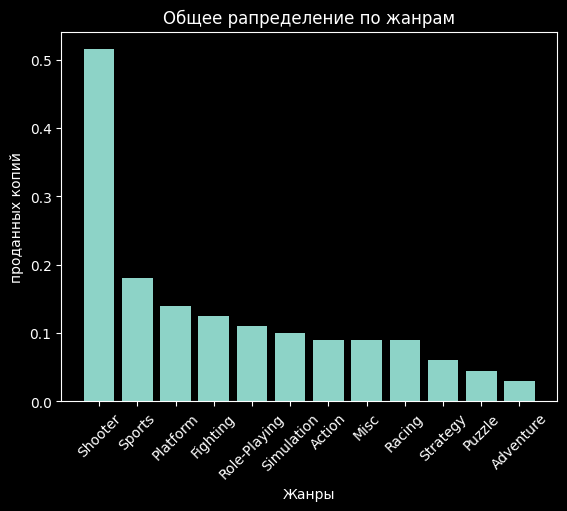

In [23]:
a_genres_spread = a_data.groupby('genre')['sales_total'].median().sort_values(ascending=False)

gn_spr_height = a_genres_spread.values
gn_spr_bars = a_genres_spread.index
x_pos = np.arange(len(gn_spr_bars))

plt.bar(x_pos, gn_spr_height, color='#8DD3C7')
 
# Общие подписи
plt.title('Общее рапределение по жанрам')
plt.xlabel('Жанры')
plt.ylabel('проданных копий')
 
# оформление подписей оси Х
plt.xticks(x_pos, gn_spr_bars, rotation=45)
 
plt.show()

Наиболее прибыльные жанр это: 
1. На первом месте шутеры 
2. На втором спортивные симуляторы 
3. На третем платформеры

## Портрет пользователя по регионам

### Популярность платформ в регионах

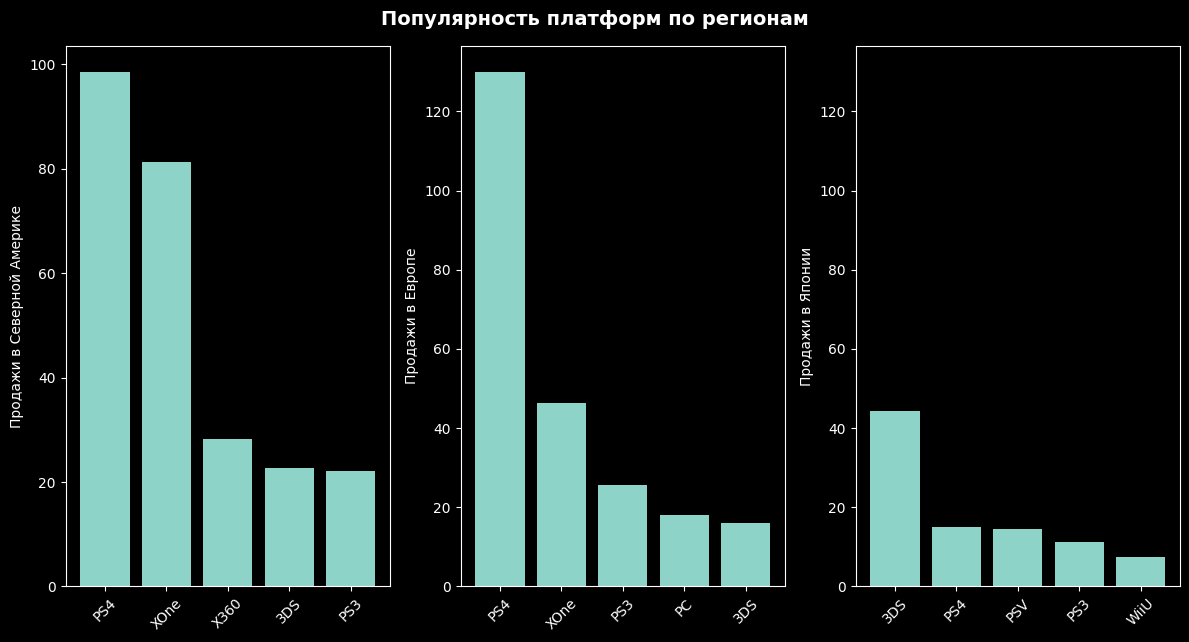

In [24]:
regions = ['na_sales', 'eu_sales', 'jp_sales']

#оформление общей рамки
fig, axes = plt.subplots(1, 3, figsize=(12, 6.5), tight_layout=True)
fig.suptitle('Популярность платформ по регионам', fontsize=14, fontweight='bold')

# Цикл для двух вложенных в рамку графиков 1-корреляция с отзывами пользователей 2-кореляция с оценками критиков
for rgn, indx in zip(regions, range(len(regions))):
    height = a_data.groupby('platform')[rgn].sum().sort_values(ascending=False).head(5).values
    bars = a_data.groupby('platform')[rgn].sum().sort_values(ascending=False).head(5).index
    x_pos = np.arange(len(bars))
    axes[indx].set_xticks(x_pos)
    axes[indx].set_xticklabels(bars, rotation=45)
    axes[indx].bar(x_pos, height, color='#8DD3C7')
    if indx > 0:
        if axes[indx].get_ylim() < axes[indx-1].get_ylim():
            axes[indx].set_ylim(axes[indx-1].get_ylim())
        elif axes[indx].get_ylim() > axes[indx-1].get_ylim():
            for i in range(indx-1):
                axes[i].set_ylim(axes[indx].get_ylim())

#оформление вложенных графиков
axes[0].set_ylabel('Продажи в Северной Америке')
axes[1].set_ylabel('Продажи в Европе')
axes[2].set_ylabel('Продажи в Японии')

plt.show()

В NA и особенно EU лидирует PS4. В Америке, более чем в других регилнах, популярны платформы Xbox. В Японии же Xbox вообще не входит в 5-ку лидеров, и там свой фаворит - портативная консоль нинтендо 3DS

### Популярность жанров в регионах

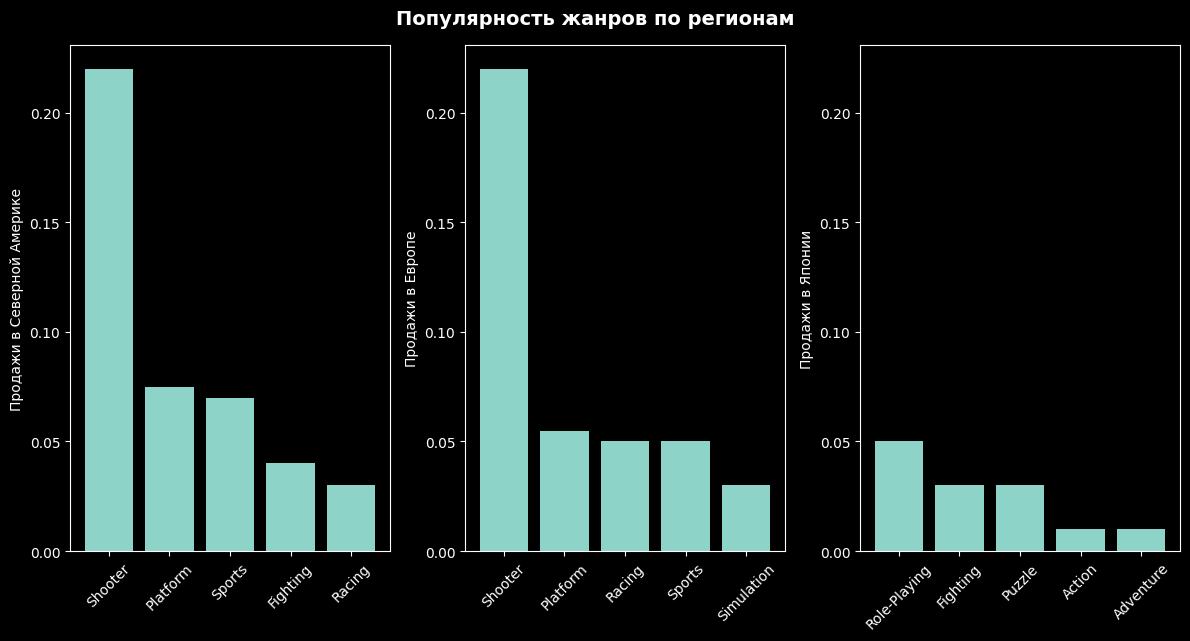

In [25]:
#оформление общей рамки
fig, axes = plt.subplots(1, 3, figsize=(12, 6.5), tight_layout=True)
fig.suptitle('Популярность жанров по регионам', fontsize=14, fontweight='bold')

# Цикл для двух вложенных в рамку графиков 1-корреляция с отзывами пользователей 2-кореляция с оценками критиков
for rgn, indx in zip(regions, range(len(regions))):
    height = a_data.groupby('genre')[rgn].median().sort_values(ascending=False).head(5).values
    bars = a_data.groupby('genre')[rgn].median().sort_values(ascending=False).head(5).index
    x_pos = np.arange(len(bars))
    axes[indx].set_xticks(x_pos)
    axes[indx].set_xticklabels(bars, rotation=45)
    axes[indx].bar(x_pos, height, color='#8DD3C7')
    if indx > 0:
        if axes[indx].get_ylim() < axes[indx-1].get_ylim():
            axes[indx].set_ylim(axes[indx-1].get_ylim())
        elif axes[indx].get_ylim() > axes[indx-1].get_ylim():
            for i in range(indx-1):
                axes[i].set_ylim(axes[indx].get_ylim())

#оформление вложенных графиков
axes[0].set_ylabel('Продажи в Северной Америке')
axes[1].set_ylabel('Продажи в Европе')
axes[2].set_ylabel('Продажи в Японии')

plt.show()

Соотношение популярных жанров в европе и северной америке похоже, с большим отрывом лидируют шутеры на втором месте платформеры, а далее с небольшим отрывом в США идут спортивные симуляторы, файтинги и гонки, а в Европе гонки, спортивные симуляторы и просто симуляторы.
В японии же картина отличается, на первом месте там РПГ игры, на втором месте файтинги, на третьем месте пазлы, потом другие игры, а так же в топ 5 входят экшн игры

Как вывод, Япония является регионом со своими жанровыми особенностями в отличии от западного мира. Шутеры там так не популярны как на западе, но популярны RPG.

*(Misc) Miscellaneous games - игры не вошедшие в другие классы по классификации Кроуфорда

### Влияние рейтинга ESBR на продажи в регионах

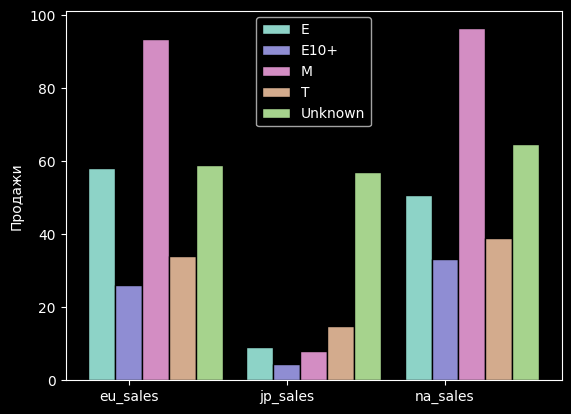

In [26]:
a_esbr_pivot = a_data.pivot_table(index='rating', values=('na_sales', 'eu_sales', 'jp_sales'), aggfunc='sum').T

bars1 = a_esbr_pivot['E'].values
bars2 = a_esbr_pivot['E10+'].values
bars3 = a_esbr_pivot['M'].values
bars4 = a_esbr_pivot['T'].values
bars5 = a_esbr_pivot['Unknown'].values

bar_width = 0.17
r1 = np.arange(len(bars1))
r2 = [x + bar_width for x in r1]
r3 = [x + bar_width for x in r2]
r4 = [x + bar_width for x in r3]
r5 = [x + bar_width for x in r4]

plt.bar(r1, bars1, width = bar_width, color = '#8DD3C7', edgecolor = 'black', capsize=7, label='E')
plt.bar(r2, bars2, width = bar_width, color = '#8F8DD3', edgecolor = 'black', capsize=7, label='E10+')
plt.bar(r3, bars3, width = bar_width, color = '#D38DC3', edgecolor = 'black', capsize=7, label='M')
plt.bar(r4, bars4, width = bar_width, color = '#D3AB8D', edgecolor = 'black', capsize=7, label='T')
plt.bar(r5, bars5, width = bar_width, color = '#A6D38D', edgecolor = 'black', capsize=7, label='Unknown')

plt.xticks([r + bar_width for r in range(len(bars1))], a_esbr_pivot.index)
plt.ylabel('Продажи')
plt.legend()
plt.show()

Эти рейтинги обозначают следующее:
- `«E»` («Everyone») — «Для всех»
- `«E10+»` («Everyone 10 and older») — «Для всех от 10 лет и старше»
- `«T»` («Teen») — «Подросткам»
- `«M»` («Mature») — «Для взрослых»

Итого мы имеем повышенный спрос на игры с рейтингом "для взрослых" в западной части нашего датасета, а в Японии подавляющее большинство игр не имеют оценки и немного выше остальных стоят подростковые игры, но на фоне отсутствующего рейтинга, эта разница кажется незначительной. Это скорее всего связано с тем что на территории Японии действует другая система рейтингов, поэтому значения о рейтингах ESRB отсутствуют. Подробнее на эту тему [тут](https://kanobu-ru.turbopages.org/kanobu.ru/s/articles/stavlyu-na-cero-368311/ "Ставлю на CERO")

## Проверка гипотез

Нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковы

Альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковы 

In [27]:
results = st.ttest_ind(
    a_data[a_data['platform'] =='XOne']['user_score'], 
    a_data[a_data['platform'] =='PC']['user_score'],
    nan_policy='omit'
)

alpha = 0.05

print(results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

0.10450507919348416
Не получилось отвергнуть нулевую гипотезу


Нулевая гипотеза: Средние пользовательские рейтинги жанров action и sports одинаковы

Альтернативная гипотеза: Средние пользовательские рейтинги жанров action и sports не одинаковы 

In [28]:
results = st.ttest_ind(
    a_data[a_data['genre'] =='Action']['user_score'], 
    a_data[a_data['genre'] =='Sports']['user_score'],
    nan_policy='omit'
)

alpha = 0.05

print(results.pvalue) 

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

2.8711147985105864e-19
Отвергаем нулевую гипотезу


## Общий вывод

### Краткий перечень проделанных действий:
- отформатировали столбцы
- избавились от строк с пропусками в столбцах с названием игр, жанром, датой релиза
- проверили наличие явных дубликатов, их не обнаружено
- добавили столбец с суммой продаж по всем регионам
- проделали исследовательский анализ данных
- построили наглядные графики, иллюстрирующие наши прогнозы
- проверили обозначенные гипотезы

### В ходе исследования мы выяснили что:

- средняя длительность жизни платформы 8 лет

- на момент 2016 года активны 9 платформ ('PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV')

- актуальным периодом стоит считать 2014-2016 гг так как в этот период уже существуют все актуальные платформы 2016 года, в этот период вероятнее всего уже сформированы актуальные трендыа, а так же прекратился спад продаж длившийся с момента кризиса 2008 года

- прогноз продаж игр к 2017 году, исходи из тенденций развития игровых платформ таков: 
    1. PlayStation 4 и Xbox One это развивающиеся платформы и будут актуальны в 2017 с большой вероятностью. Продажи на актуальный период у обеих платформ очень близки и имеют разброс от 100 до 1100 млн проданных копий. при учёте тенденций к увелечению, это платформы, которые определённо стоит рассматривать.

    2. PlayStation 3 и Xbox 360 платформы на момент 2016 года ещё довольно существенно представлены на рынке, но продажи стремительно падают и на смену им пришли новые поколения приставок.

    3. игры на PC не имеют больших показателей продаж по сравнению с консолями, но платформа не стареющая и спрос на неё не падает

    4. в Японии ещё будет сохранять свою актуальность консоль Nintende 3DS, но её продажи падают и будут меньше чем в 2016 году. можно расчитывать на небольшой объём продаж, но делать упор на эту платформу не стоит

    5. Nintendo Wii явно теряет актуальность, а пришедшая ей на смену WiiU на старте своих продаж не возимела успеха и продажи начали падать почти сразу, расчитывать на успех этой платформы рисковано

    6. PlayStation Vita тоже  мало популярная консоль, продажи большими и не были даже на пике, и они продолжают падать

- отзывы критиков коррелируют с продажами и не зависит от платформы. Нельзя точно сказать о причинно следственной связи, влияют ли отзывы на продажи или хорошие продажи, стимулируют писать хорошие отзывы, но корреляцию стоит учитывать в принятии решений

- отзывы пользователей не зависят от продаж, они могут плохо оценить продаваемую игру, могут хорошо отозватся о плохо продоваемой, связи не прослеживается и это не должно влиять на прогнозы прибыльности той или иной игры

- в Европе и Северной америке самые популярные жанры это Shooter, Sport, Platform в такой последовательности по убыванию. В Японии же лидирует RPG жанр

- Япония является регионом со своими жанровыми особенностями в отличии от западного мира. Шутеры там так не популярны как на западе, но популярны RPG.

- в Европе и Северной америке популярны игры получившие рейтинг M (для взрослых) по оценке ESRB

- в Японии распространена другая система возрастных рейтингов игр, поэтому опиратся на ESRB в японии не стоит

- средние пользовательские рейтинги платформ Xbox One и PC одинаковы

- средние пользовательские рейтинги жанров action и sports не одинаковы
